In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt

import numpy as np
from numpy.fft import fft

import fastai as meta_fai
import fastai.vision as fv
import fastai.basics as fai

In [3]:
clip, sample_rate = librosa.load("Ed Sheeran-Little Bird Lyrics.mp3", sr=None)
clip = clip[:132300]

[ 0.        0.        0.        0.       ... -0.087387 -0.084076 -0.081894 -0.079819]
(132300,)


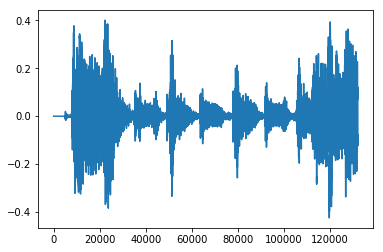

In [4]:
plt.plot(clip)
print(clip)
print(clip.shape)

In [5]:
n_fft = 1024
start = 100000
X = clip[start:start+n_fft]
X = fft(X)
X_magnitude, X_phase = librosa.magphase(X)
X_magnitude_db = librosa.amplitude_to_db(X_magnitude)

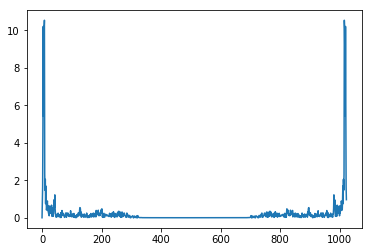

In [6]:
plt.plot(X_magnitude)

In [7]:
hop_length = 512
stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

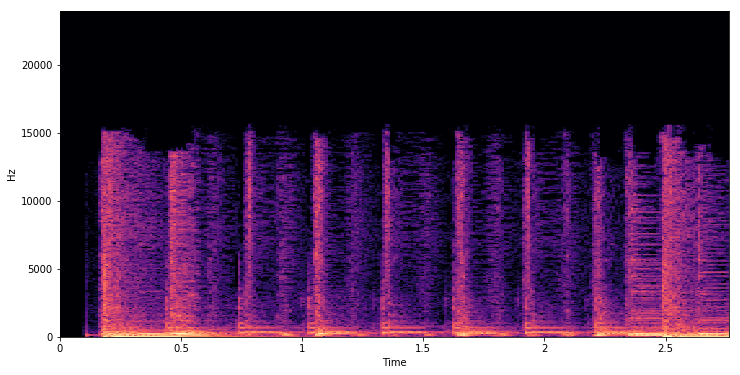

In [8]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)